In [1]:
import scanpy as sc
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad
import pickle


In [2]:
adata = ad.read_h5ad("../../tmp_dialogue_experiments/data/v2/uc-dialogue-reduced-output-lp/uc-dialogue-reduced_pmd.h5ad")

multilevel_results = pickle.load(
    open("../../tmp_dialogue_experiments/data/v2/uc-dialogue-reduced-output-lp/uc-dialogue-reduced_multilevel-results", "rb")
)
multilevel_mcps = pickle.load(
    open("../../tmp_dialogue_experiments/data/v2/uc-dialogue-reduced-output-lp/uc-dialogue-reduced_multilevel-mcps", "rb")
)

#print(adata.obs)
#print(multilevel_results)
#print(multilevel_mcps)

In [3]:
genes = adata.var_names
genes

Index(['SUMO4', 'PROX1', 'ZNF485', 'C12orf57', 'CNN1', 'NLGN4Y', 'FAM46C',
       'COX10-AS1', 'C12orf10', 'MDH1',
       ...
       'PTPN21', 'MDC1', 'PAPOLB', 'TOB1-AS1', 'TSC22D4', 'MOGAT3',
       'RP11-21M24.2', 'POLR2H', 'MIR17HG', 'MT-TL1'],
      dtype='object', length=1817)

In [4]:
samples = adata.obs['Sample'].unique()
samples

['N44.LPA', 'N46.LPB', 'N24.LPA', 'N106.LPB', 'N19.LPA', ..., 'N15.EpiA', 'N110.LPA', 'N8.LPB', 'N11.LPB', 'N58.LPA2']
Length: 65
Categories (65, object): ['N7.LPA', 'N7.LPB', 'N8.LPB', 'N9.LPA', ..., 'N539.LPA', 'N539.LPB', 'N661.LPA1', 'N661.LPA2']

In [5]:
adata.obs

,Cluster,nGene,nUMI,Subject,Health,Location,Sample,cellQ,cell_type,log_nUMI,mcp_0,mcp_1,mcp_2
N44.LPA.GGGAATGAGCGTTCCG-immune,Plasma,238.0,20502.0,N44,Non-inflamed,LP,N44.LPA,0.280753,immune,9.928278,1.202523,1.063884,0.728866
N46.LPB.TCAGCAAAGTACGTAA-immune,Macrophages,2238.0,4667.0,N46,Healthy,LP,N46.LPB,0.027086,immune,8.448272,2.874559,2.217327,0.747108
N24.LPA.CATTATCTCTCTAGGA-immune,Plasma,592.0,3152.0,N24,Non-inflamed,LP,N24.LPA,0.274708,immune,8.055792,-1.622435,-1.566449,-1.431538
N106.LPB.AAGGTTCCAGGACGTA-immune,CD4+ Memory,4288.0,8336.0,N106,Inflamed,LP,N106.LPB,0.033489,immune,9.028339,0.823559,0.977053,1.379494
N19.LPA.CATGTACTTGGGAG-immune,CD4+ Memory,4932.0,10050.0,N19,Non-inflamed,LP,N19.LPA,0.098258,immune,9.215328,-0.146011,0.004276,0.465039
...,...,...,...,...,...,...,...,...,...,...,...,...,...
N14.LPB.TCGAGCCTTGCCCT-epithelial,TA 1,365.0,640.0,N14,Inflamed,LP,N14.LPB,0.008487,epithelial,6.461468,-0.464320,-0.438929,-0.380920
N110.LPB.AGAGTGGCAGCAGTTT-epithelial,Cycling TA,2360.0,7990.0,N110,Inflamed,LP,N110.LPB,0.247375,epithelial,8.985946,2.194814,2.073045,1.598980
N110.LPA.CATATGGTCGGTGTCG-epithelial,Cycling TA,867.0,1924.0,N110,Non-inflamed,LP,N110.LPA,0.014543,epithelial,7.562162,-2.550835,-2.661952,-2.852229
N21.LPA.TTCATGTGACGGGA-epithelial,Enteroendocrine,2325.0,13540.0,N21,Healthy,LP,N21.LPA,0.295743,epithelial,9.513404,-1.942646,-1.837085,-1.402929


In [6]:
cell_type=adata.obs['cell_type'].unique()
cell_type

['immune', 'fibroblast', 'epithelial']
Categories (3, object): ['epithelial', 'fibroblast', 'immune']

### all significant genes

In [7]:
sig_genes_down_fe = multilevel_results['fibroblast_vs_epithelial']['MCP1']['sig_genes_1']['MCP1.down']+ multilevel_results['fibroblast_vs_epithelial']['MCP1']['sig_genes_2']['MCP1.down']
sig_genes_up_fe = multilevel_results['fibroblast_vs_epithelial']['MCP1']['sig_genes_1']['MCP1.up'] + multilevel_results['fibroblast_vs_epithelial']['MCP1']['sig_genes_2']['MCP1.up']
sig_genes_down_if = multilevel_results['immune_vs_fibroblast']['MCP1']['sig_genes_1']['MCP1.down'] + multilevel_results['immune_vs_fibroblast']['MCP1']['sig_genes_2']['MCP1.down']
sig_genes_up_if = multilevel_results['immune_vs_fibroblast']['MCP1']['sig_genes_1']['MCP1.up'] + multilevel_results['immune_vs_fibroblast']['MCP1']['sig_genes_2']['MCP1.up']
sig_genes_down_ie = multilevel_results['immune_vs_epithelial']['MCP1']['sig_genes_1']['MCP1.down'] + multilevel_results['immune_vs_epithelial']['MCP1']['sig_genes_2']['MCP1.down']
sig_genes_up_ie = multilevel_results['immune_vs_epithelial']['MCP1']['sig_genes_1']['MCP1.up'] + multilevel_results['immune_vs_epithelial']['MCP1']['sig_genes_2']['MCP1.up']

In [8]:
sig_genes_fe = sig_genes_down_fe+ sig_genes_up_fe
sig_genes_if = sig_genes_down_if + sig_genes_up_if
sig_genes_ie = sig_genes_down_ie + sig_genes_up_ie
all_sig_genes = sig_genes_fe + sig_genes_ie + sig_genes_if

In [9]:
data = adata.X.toarray()
df_X = pd.DataFrame(data, columns=genes, index=adata.obs.index)
df_X

,SUMO4,PROX1,ZNF485,C12orf57,CNN1,NLGN4Y,FAM46C,COX10-AS1,C12orf10,MDH1,...,PTPN21,MDC1,PAPOLB,TOB1-AS1,TSC22D4,MOGAT3,RP11-21M24.2,POLR2H,MIR17HG,MT-TL1
N44.LPA.GGGAATGAGCGTTCCG-immune,-0.032145,-0.019554,-0.050707,-0.660579,-0.022129,-0.013953,-0.560755,-0.069224,2.577191,-0.395536,...,-0.018811,-0.094404,-0.017137,-0.069245,-0.377753,-0.032433,-0.020154,2.442261,-0.081550,-0.055984
N46.LPB.TCAGCAAAGTACGTAA-immune,-0.032145,-0.019554,-0.050707,-0.057215,10.000000,-0.013953,-0.560755,-0.069224,-0.268769,1.535383,...,-0.018811,-0.094404,-0.017137,-0.069245,-0.377753,-0.032433,-0.020154,-0.284496,-0.081550,-0.055984
N24.LPA.CATTATCTCTCTAGGA-immune,-0.032145,-0.019554,-0.050707,0.705892,-0.022129,-0.013953,0.708476,-0.069224,-0.268769,-0.395536,...,-0.018811,-0.094404,-0.017137,-0.069245,-0.377753,-0.032433,-0.020154,-0.284496,-0.081550,-0.055984
N106.LPB.AAGGTTCCAGGACGTA-immune,-0.032145,-0.019554,-0.050707,-0.660579,-0.022129,-0.013953,-0.560755,-0.069224,-0.268769,-0.395536,...,-0.018811,-0.094404,-0.017137,-0.069245,-0.377753,-0.032433,-0.020154,-0.284496,-0.081550,-0.055984
N19.LPA.CATGTACTTGGGAG-immune,-0.032145,-0.019554,-0.050707,-0.660579,-0.022129,-0.013953,-0.560755,-0.069224,-0.268769,-0.395536,...,-0.018811,-0.094404,-0.017137,-0.069245,-0.377753,-0.032433,-0.020154,-0.284496,-0.081550,-0.055984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N14.LPB.TCGAGCCTTGCCCT-epithelial,-0.034976,-0.131128,-0.085352,-0.778102,-0.012059,-0.017647,-0.273166,-0.077114,-0.379752,-0.673904,...,-0.147155,-0.133279,-0.018791,-0.110580,-0.331206,-0.259076,-0.023423,-0.539628,-0.079738,-0.212178
N110.LPB.AGAGTGGCAGCAGTTT-epithelial,-0.034976,-0.131128,-0.085352,1.426202,-0.012059,-0.017647,-0.273166,-0.077114,-0.379752,-0.673904,...,-0.147155,-0.133279,-0.018791,-0.110580,1.863687,-0.259076,-0.023423,-0.539628,-0.079738,-0.212178
N110.LPA.CATATGGTCGGTGTCG-epithelial,-0.034976,-0.131128,-0.085352,-0.778102,-0.012059,-0.017647,-0.273166,-0.077114,-0.379752,-0.673904,...,-0.147155,-0.133279,-0.018791,-0.110580,-0.331206,-0.259076,-0.023423,-0.539628,-0.079738,-0.212178
N21.LPA.TTCATGTGACGGGA-epithelial,-0.034976,-0.131128,-0.085352,-0.098107,-0.012059,-0.017647,-0.273166,-0.077114,-0.379752,0.040130,...,-0.147155,-0.133279,-0.018791,-0.110580,1.164425,-0.259076,-0.023423,-0.539628,-0.079738,-0.212178


In [10]:
adata.obs['cell_type']== "immune"

N44.LPA.GGGAATGAGCGTTCCG-immune           True
N46.LPB.TCAGCAAAGTACGTAA-immune           True
N24.LPA.CATTATCTCTCTAGGA-immune           True
N106.LPB.AAGGTTCCAGGACGTA-immune          True
N19.LPA.CATGTACTTGGGAG-immune             True
                                         ...  
N14.LPB.TCGAGCCTTGCCCT-epithelial        False
N110.LPB.AGAGTGGCAGCAGTTT-epithelial     False
N110.LPA.CATATGGTCGGTGTCG-epithelial     False
N21.LPA.TTCATGTGACGGGA-epithelial        False
N52.LPA1b.TGGTTAGTCTGTCAAG-epithelial    False
Name: cell_type, Length: 8576, dtype: bool

#### only one cell type 

In [11]:
# get only samples where cell type = immune

df_immune = df_X.loc[adata.obs['cell_type']== "immune"]
df_immune


,SUMO4,PROX1,ZNF485,C12orf57,CNN1,NLGN4Y,FAM46C,COX10-AS1,C12orf10,MDH1,...,PTPN21,MDC1,PAPOLB,TOB1-AS1,TSC22D4,MOGAT3,RP11-21M24.2,POLR2H,MIR17HG,MT-TL1
N44.LPA.GGGAATGAGCGTTCCG-immune,-0.032145,-0.019554,-0.050707,-0.660579,-0.022129,-0.013953,-0.560755,-0.069224,2.577191,-0.395536,...,-0.018811,-0.094404,-0.017137,-0.069245,-0.377753,-0.032433,-0.020154,2.442261,-0.08155,-0.055984
N46.LPB.TCAGCAAAGTACGTAA-immune,-0.032145,-0.019554,-0.050707,-0.057215,10.000000,-0.013953,-0.560755,-0.069224,-0.268769,1.535383,...,-0.018811,-0.094404,-0.017137,-0.069245,-0.377753,-0.032433,-0.020154,-0.284496,-0.08155,-0.055984
N24.LPA.CATTATCTCTCTAGGA-immune,-0.032145,-0.019554,-0.050707,0.705892,-0.022129,-0.013953,0.708476,-0.069224,-0.268769,-0.395536,...,-0.018811,-0.094404,-0.017137,-0.069245,-0.377753,-0.032433,-0.020154,-0.284496,-0.08155,-0.055984
N106.LPB.AAGGTTCCAGGACGTA-immune,-0.032145,-0.019554,-0.050707,-0.660579,-0.022129,-0.013953,-0.560755,-0.069224,-0.268769,-0.395536,...,-0.018811,-0.094404,-0.017137,-0.069245,-0.377753,-0.032433,-0.020154,-0.284496,-0.08155,-0.055984
N19.LPA.CATGTACTTGGGAG-immune,-0.032145,-0.019554,-0.050707,-0.660579,-0.022129,-0.013953,-0.560755,-0.069224,-0.268769,-0.395536,...,-0.018811,-0.094404,-0.017137,-0.069245,-0.377753,-0.032433,-0.020154,-0.284496,-0.08155,-0.055984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N24.LPB.TCGAGGCTCTGGCGTG-immune,-0.032145,-0.019554,-0.050707,-0.660579,-0.022129,-0.013953,-0.560755,-0.069224,-0.268769,3.632035,...,-0.018811,-0.094404,-0.017137,-0.069245,-0.377753,-0.032433,-0.020154,-0.284496,-0.08155,-0.055984
N50.LPA.GTATTCTGTTACCAGT-immune,-0.032145,-0.019554,-0.050707,1.565138,-0.022129,-0.013953,-0.560755,-0.069224,-0.268769,-0.395536,...,-0.018811,-0.094404,-0.017137,-0.069245,-0.377753,-0.032433,-0.020154,-0.284496,-0.08155,-0.055984
N111.LPB2.GCAAACTCAGCTCCGA-immune,-0.032145,-0.019554,-0.050707,-0.660579,-0.022129,-0.013953,-0.560755,-0.069224,-0.268769,-0.395536,...,-0.018811,-0.094404,-0.017137,-0.069245,-0.377753,-0.032433,-0.020154,-0.284496,-0.08155,-0.055984
N21.LPA.GCCAAAACGGCATT-immune,-0.032145,-0.019554,-0.050707,-0.660579,-0.022129,-0.013953,-0.560755,-0.069224,-0.268769,2.818378,...,-0.018811,-0.094404,-0.017137,-0.069245,-0.377753,-0.032433,-0.020154,-0.284496,-0.08155,-0.055984


In [12]:
df_sig_fe = df_immune.loc[:, df_immune.columns.isin(sig_genes_fe)]
df_sig_fe

,PROX1,RP11-427H3.3,RBM27,TCF12,RBBP8,ANO6,S100P,FAM208A,THOC2,MAP3K13,...,ASPH,TNFRSF17,MEF2C,RALGAPA1,RAB3D,PBRM1,SLC4A7,SRSF2,FABP2,MIR17HG
N44.LPA.GGGAATGAGCGTTCCG-immune,-0.019554,-0.143826,-0.249645,-0.124664,-0.135141,-0.102354,-0.101306,-0.153402,-0.264285,-0.289301,...,-0.134486,0.699056,-0.441487,-0.206979,-0.131816,-0.225101,-0.158693,0.372146,-0.044539,-0.08155
N46.LPB.TCAGCAAAGTACGTAA-immune,-0.019554,-0.143826,-0.249645,-0.124664,-0.135141,-0.102354,-0.101306,1.878032,-0.264285,0.949688,...,-0.134486,-0.608675,0.375965,1.270938,-0.131816,-0.225101,3.000367,0.576068,-0.044539,-0.08155
N24.LPA.CATTATCTCTCTAGGA-immune,-0.019554,-0.143826,-0.249645,-0.124664,-0.135141,-0.102354,-0.101306,-0.153402,-0.264285,-0.289301,...,-0.134486,1.783194,-0.441487,-0.206979,-0.131816,-0.225101,-0.158693,-0.200724,-0.044539,-0.08155
N106.LPB.AAGGTTCCAGGACGTA-immune,-0.019554,-0.143826,-0.249645,-0.124664,-0.135141,-0.102354,-0.101306,-0.153402,-0.264285,-0.289301,...,-0.134486,-0.608675,-0.441487,-0.206979,-0.131816,-0.225101,-0.158693,-0.787973,-0.044539,-0.08155
N19.LPA.CATGTACTTGGGAG-immune,-0.019554,-0.143826,-0.249645,-0.124664,-0.135141,-0.102354,-0.101306,-0.153402,-0.264285,-0.289301,...,-0.134486,-0.608675,-0.441487,-0.206979,-0.131816,-0.225101,-0.158693,1.055275,-0.044539,-0.08155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N24.LPB.TCGAGGCTCTGGCGTG-immune,-0.019554,-0.143826,-0.249645,-0.124664,-0.135141,-0.102354,-0.101306,-0.153402,-0.264285,-0.289301,...,-0.134486,-0.608675,-0.441487,-0.206979,-0.131816,-0.225101,-0.158693,-0.787973,-0.044539,-0.08155
N50.LPA.GTATTCTGTTACCAGT-immune,-0.019554,-0.143826,-0.249645,-0.124664,-0.135141,-0.102354,-0.101306,-0.153402,-0.264285,-0.289301,...,-0.134486,-0.608675,-0.441487,-0.206979,-0.131816,-0.225101,-0.158693,-0.787973,-0.044539,-0.08155
N111.LPB2.GCAAACTCAGCTCCGA-immune,-0.019554,-0.143826,4.356304,8.971045,-0.135141,-0.102354,-0.101306,-0.153402,-0.264285,-0.289301,...,-0.134486,-0.608675,-0.441487,-0.206979,-0.131816,-0.225101,6.431277,-0.787973,-0.044539,-0.08155
N21.LPA.GCCAAAACGGCATT-immune,-0.019554,-0.143826,-0.249645,-0.124664,-0.135141,-0.102354,-0.101306,7.052271,-0.264285,-0.289301,...,-0.134486,-0.608675,-0.441487,-0.206979,-0.131816,-0.225101,-0.158693,-0.787973,-0.044539,-0.08155


In [13]:
# sort sample by overall expression 

df_sorted_immune = df_sig_fe.loc[df_sig_fe.mean(axis=1).sort_values(ascending=False).index]
df_sorted_immune

,PROX1,RP11-427H3.3,RBM27,TCF12,RBBP8,ANO6,S100P,FAM208A,THOC2,MAP3K13,...,ASPH,TNFRSF17,MEF2C,RALGAPA1,RAB3D,PBRM1,SLC4A7,SRSF2,FABP2,MIR17HG
N539.LPA.CCTTCCCAGTGGCACA-immune,-0.019554,5.873167,3.565466,-0.124664,-0.135141,-0.102354,-0.101306,5.635914,3.368016,-0.289301,...,-0.134486,-0.608675,-0.441487,-0.206979,-0.131816,4.134964,-0.158693,0.758154,-0.044539,-0.08155
N539.LPA.CGTTCTGCAATAGCGG-immune,-0.019554,-0.143826,4.899481,10.000000,-0.135141,-0.102354,-0.101306,-0.153402,-0.264285,-0.289301,...,-0.134486,-0.608675,-0.441487,-0.206979,-0.131816,-0.225101,7.208428,-0.787973,-0.044539,-0.08155
N539.LPB.CATTATCGTTGAACTC-immune,-0.019554,-0.143826,1.865819,-0.124664,-0.135141,9.314315,-0.101306,3.056750,2.828492,1.668598,...,-0.134486,-0.608675,0.850282,-0.206979,-0.131816,-0.225101,-0.158693,0.528500,-0.044539,-0.08155
N49.LPA.GACGGCTTCCGCATCT-immune,-0.019554,-0.143826,-0.249645,-0.124664,-0.135141,8.357706,-0.101306,-0.153402,3.180197,-0.289301,...,-0.134486,1.044059,-0.441487,-0.206979,-0.131816,3.909514,-0.158693,1.256293,-0.044539,-0.08155
N539.LPA.TTGGCAACAGGACGTA-immune,-0.019554,-0.143826,-0.249645,-0.124664,-0.135141,-0.102354,-0.101306,-0.153402,2.579741,-0.289301,...,-0.134486,2.051128,1.382570,-0.206979,-0.131816,-0.225101,-0.158693,-0.787973,-0.044539,-0.08155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N19.LPB.TAACATGATATCGG-immune,-0.019554,-0.143826,-0.249645,-0.124664,-0.135141,-0.102354,-0.101306,-0.153402,-0.264285,-0.289301,...,-0.134486,-0.608675,-0.441487,-0.206979,-0.131816,-0.225101,-0.158693,-0.787973,-0.044539,-0.08155
N14.LPB.GACGGCACACTCAG-immune,-0.019554,-0.143826,-0.249645,-0.124664,-0.135141,-0.102354,-0.101306,-0.153402,-0.264285,-0.289301,...,-0.134486,-0.608675,-0.441487,-0.206979,-0.131816,-0.225101,-0.158693,-0.787973,-0.044539,-0.08155
N111.LPB2.CAGTCCTGTCGACTGC-immune,-0.019554,-0.143826,-0.249645,-0.124664,-0.135141,-0.102354,-0.101306,-0.153402,-0.264285,-0.289301,...,-0.134486,-0.608675,-0.441487,-0.206979,-0.131816,-0.225101,-0.158693,-0.787973,-0.044539,-0.08155
N18.LPA.AGACACTGGACTAC-immune,-0.019554,-0.143826,-0.249645,-0.124664,-0.135141,-0.102354,-0.101306,-0.153402,-0.264285,-0.289301,...,-0.134486,-0.608675,-0.441487,-0.206979,-0.131816,-0.225101,-0.158693,-0.787973,-0.044539,-0.08155


In [ ]:
# preprocess 

In [14]:
# change rownames to sample names
new_index = [ '.'.join(name.split('.')[:2]) for name in df_sorted_immune.index ]
df_sorted_immune.index = new_index
df_sorted_immune

,PROX1,RP11-427H3.3,RBM27,TCF12,RBBP8,ANO6,S100P,FAM208A,THOC2,MAP3K13,...,ASPH,TNFRSF17,MEF2C,RALGAPA1,RAB3D,PBRM1,SLC4A7,SRSF2,FABP2,MIR17HG
N539.LPA,-0.019554,5.873167,3.565466,-0.124664,-0.135141,-0.102354,-0.101306,5.635914,3.368016,-0.289301,...,-0.134486,-0.608675,-0.441487,-0.206979,-0.131816,4.134964,-0.158693,0.758154,-0.044539,-0.08155
N539.LPA,-0.019554,-0.143826,4.899481,10.000000,-0.135141,-0.102354,-0.101306,-0.153402,-0.264285,-0.289301,...,-0.134486,-0.608675,-0.441487,-0.206979,-0.131816,-0.225101,7.208428,-0.787973,-0.044539,-0.08155
N539.LPB,-0.019554,-0.143826,1.865819,-0.124664,-0.135141,9.314315,-0.101306,3.056750,2.828492,1.668598,...,-0.134486,-0.608675,0.850282,-0.206979,-0.131816,-0.225101,-0.158693,0.528500,-0.044539,-0.08155
N49.LPA,-0.019554,-0.143826,-0.249645,-0.124664,-0.135141,8.357706,-0.101306,-0.153402,3.180197,-0.289301,...,-0.134486,1.044059,-0.441487,-0.206979,-0.131816,3.909514,-0.158693,1.256293,-0.044539,-0.08155
N539.LPA,-0.019554,-0.143826,-0.249645,-0.124664,-0.135141,-0.102354,-0.101306,-0.153402,2.579741,-0.289301,...,-0.134486,2.051128,1.382570,-0.206979,-0.131816,-0.225101,-0.158693,-0.787973,-0.044539,-0.08155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N19.LPB,-0.019554,-0.143826,-0.249645,-0.124664,-0.135141,-0.102354,-0.101306,-0.153402,-0.264285,-0.289301,...,-0.134486,-0.608675,-0.441487,-0.206979,-0.131816,-0.225101,-0.158693,-0.787973,-0.044539,-0.08155
N14.LPB,-0.019554,-0.143826,-0.249645,-0.124664,-0.135141,-0.102354,-0.101306,-0.153402,-0.264285,-0.289301,...,-0.134486,-0.608675,-0.441487,-0.206979,-0.131816,-0.225101,-0.158693,-0.787973,-0.044539,-0.08155
N111.LPB2,-0.019554,-0.143826,-0.249645,-0.124664,-0.135141,-0.102354,-0.101306,-0.153402,-0.264285,-0.289301,...,-0.134486,-0.608675,-0.441487,-0.206979,-0.131816,-0.225101,-0.158693,-0.787973,-0.044539,-0.08155
N18.LPA,-0.019554,-0.143826,-0.249645,-0.124664,-0.135141,-0.102354,-0.101306,-0.153402,-0.264285,-0.289301,...,-0.134486,-0.608675,-0.441487,-0.206979,-0.131816,-0.225101,-0.158693,-0.787973,-0.044539,-0.08155


/dss/dsshome1/lxc08/gobi003/miniconda3/envs/pertpy_env/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


ValueError: The condensed distance matrix must contain only finite values.

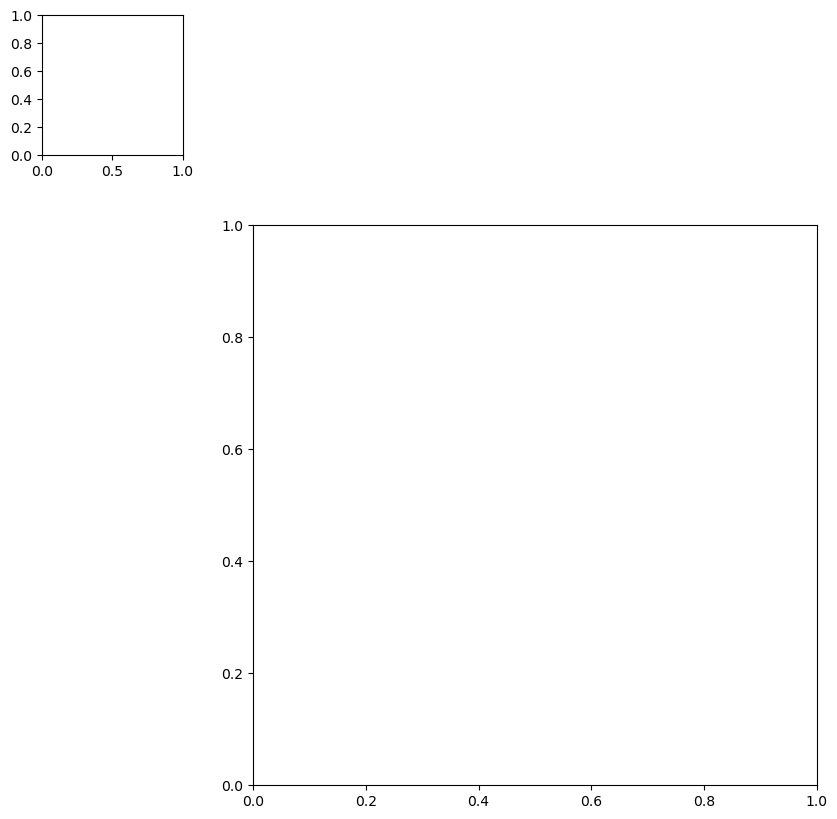

In [24]:
g = sns.clustermap(df_sorted_immune,  row_cluster=False, cmap="YlGnBu", metric='correlation')
g.fig.suptitle('immune') 


Text(0.5, 0.98, 'immune')

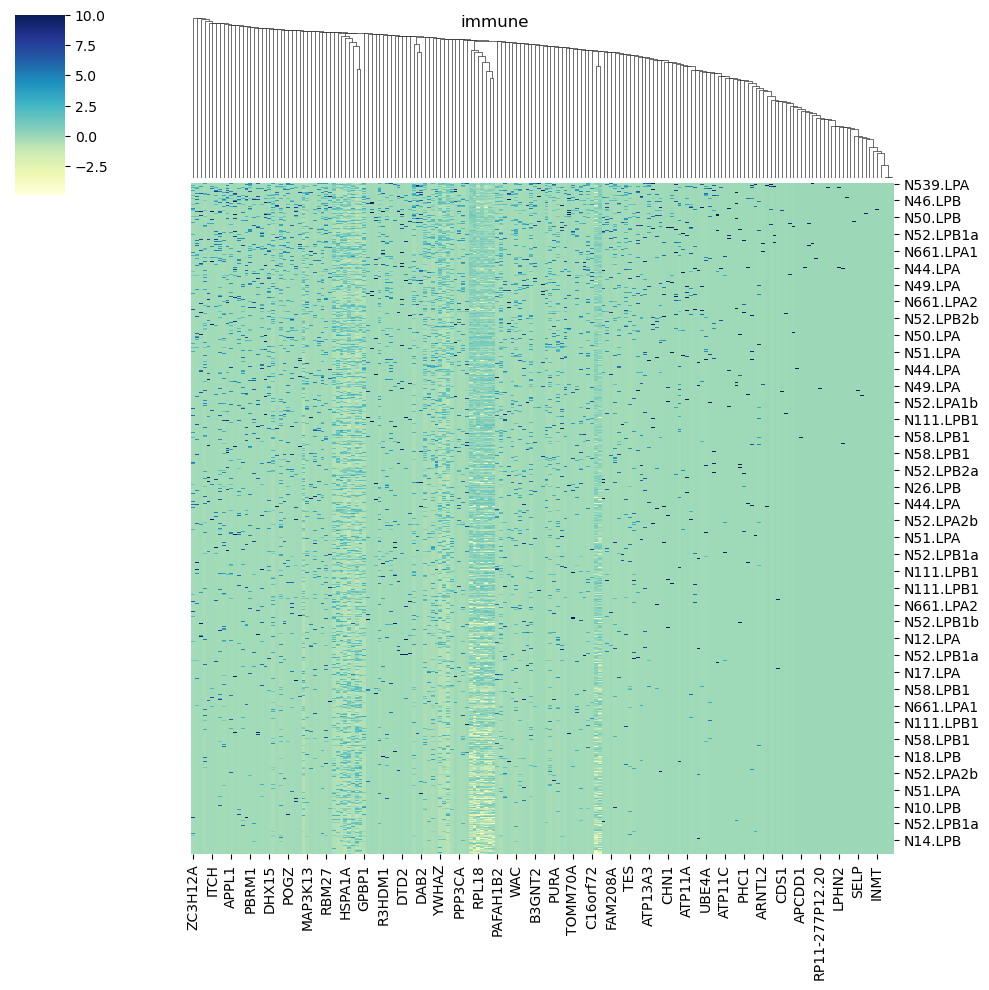

In [18]:
g = sns.clustermap(df_sorted_immune,  row_cluster=False, cmap="YlGnBu")
g.fig.suptitle('immune') 


/dss/dsshome1/lxc08/gobi003/miniconda3/envs/pertpy_env/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, 0.98, 'epithelial')

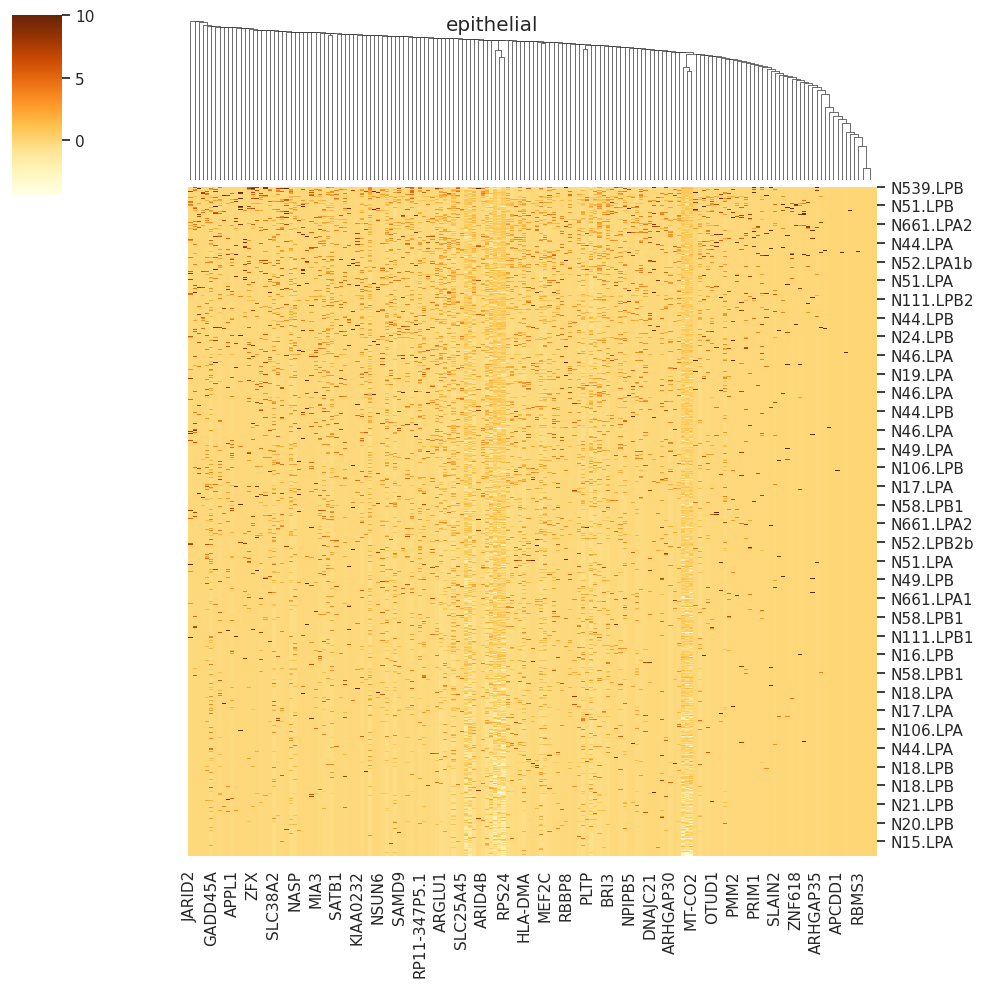

In [47]:
df_epithelial = df_X.loc[adata.obs['cell_type'] == 'epithelial']
df_sig_if = df_immune.loc[:, df_epithelial.columns.isin(sig_genes_if)]
df_sorted_epithelial = df_sig_if.loc[df_sig_if.mean(axis=1).sort_values(ascending=False).index]
new_index = [ '.'.join(name.split('.')[:2]) for name in df_sorted_epithelial.index ]
df_sorted_epithelial.index = new_index
g = sns.clustermap(df_sorted_epithelial,  row_cluster=False, cmap="YlOrBr")
g.fig.suptitle('epithelial') 

In [48]:
df_sorted_fibroblast

,PROX1,C12orf57,MDH1,RP11-427H3.3,APRT,CAPG,SUPT5H,MOB3A,RPL11,RPS6,...,EHMT1,RALGAPA1,RAB3D,PBRM1,NFKB2,SLC4A7,VASP,SRSF2,FABP2,MIR17HG
N539.LPB,-0.019554,-0.660579,2.330007,-0.143826,0.124403,-0.356933,-0.268142,-0.287570,-0.316227,-0.665069,...,2.153579,-0.206979,-0.131816,-0.225101,-0.27457,-0.158693,1.034417,0.528500,-0.044539,-0.08155
N539.LPA,-0.019554,1.058929,-0.395536,5.873167,1.463821,-0.356933,-0.268142,-0.287570,0.687564,-0.213443,...,-0.227437,-0.206979,-0.131816,4.134964,-0.27457,-0.158693,-0.372141,0.758154,-0.044539,-0.08155
N539.LPB,-0.019554,-0.660579,-0.395536,-0.143826,-0.774678,-0.356933,-0.268142,-0.287570,-0.302399,-1.406581,...,5.287975,5.202914,-0.131816,-0.225101,-0.27457,-0.158693,-0.372141,1.197935,-0.044539,-0.08155
N539.LPB,-0.019554,-0.660579,-0.395536,-0.143826,0.723677,-0.356933,3.209714,2.859719,-0.424427,-0.044315,...,-0.227437,-0.206979,-0.131816,-0.225101,-0.27457,3.182513,-0.372141,0.640787,-0.044539,-0.08155
N539.LPA,-0.019554,-0.660579,-0.395536,-0.143826,-0.774678,1.710236,-0.268142,-0.287570,0.575548,0.389199,...,-0.227437,-0.206979,-0.131816,-0.225101,-0.27457,-0.158693,-0.372141,0.632731,-0.044539,-0.08155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N21.LPA,-0.019554,-0.660579,-0.395536,-0.143826,-0.774678,-0.356933,-0.268142,-0.287570,-1.841527,-1.559435,...,-0.227437,-0.206979,-0.131816,-0.225101,-0.27457,-0.158693,-0.372141,-0.787973,-0.044539,-0.08155
N58.LPA1,-0.019554,-0.660579,-0.395536,-0.143826,-0.774678,-0.356933,-0.268142,-0.287570,-3.854255,-1.273767,...,-0.227437,-0.206979,-0.131816,-0.225101,-0.27457,-0.158693,-0.372141,-0.787973,-0.044539,-0.08155
N9.LPA,-0.019554,-0.660579,-0.395536,-0.143826,-0.774678,-0.356933,-0.268142,-0.287570,-1.714844,-1.105762,...,-0.227437,-0.206979,-0.131816,-0.225101,-0.27457,-0.158693,-0.372141,-0.787973,-0.044539,-0.08155
N111.LPB2,-0.019554,-0.660579,-0.395536,-0.143826,-0.774678,-0.356933,-0.268142,-0.287570,-3.854255,-0.970478,...,-0.227437,-0.206979,-0.131816,-0.225101,-0.27457,-0.158693,-0.372141,-0.787973,-0.044539,-0.08155


/dss/dsshome1/lxc08/gobi003/miniconda3/envs/pertpy_env/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, 0.98, 'fibroblast')

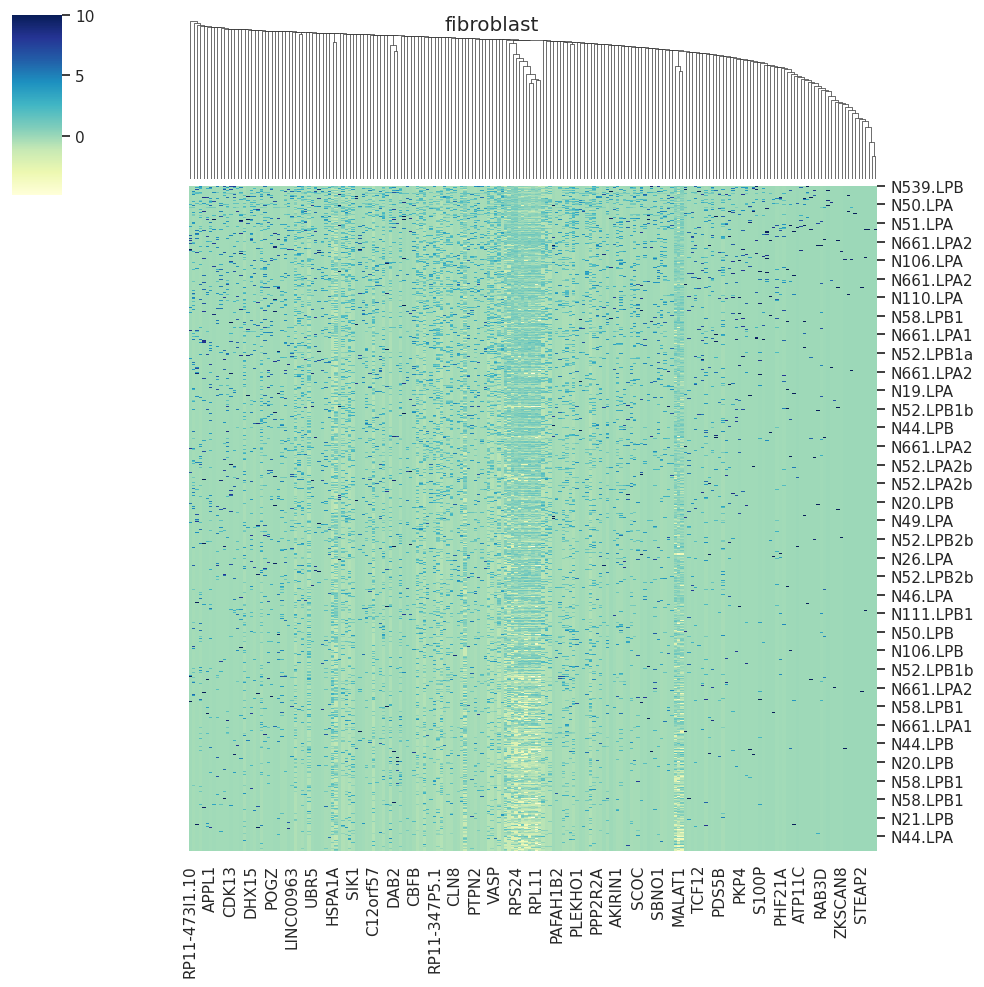

In [55]:
df_fibroblast = df_X.loc[adata.obs['cell_type'] == 'fibroblast']
df_sig_ie = df_immune.loc[:, df_fibroblast.columns.isin(sig_genes_ie)]
df_sorted_fibroblast = df_sig_ie.loc[df_sig_ie.mean(axis=1).sort_values(ascending=False).index]
new_index = [ '.'.join(name.split('.')[:2]) for name in df_sorted_fibroblast.index ]
df_sorted_fibroblast.index = new_index
g = sns.clustermap(df_sorted_fibroblast,  row_cluster=False, cmap="YlGnBu")
g.fig.suptitle('fibroblast') 


### overall cell types

In [56]:
'''sig_genes_fe = sig_genes_down_fe+ sig_genes_up_fe
sig_genes_if = sig_genes_down_if + sig_genes_up_if
sig_genes_ie = sig_genes_down_ie + sig_genes_up_ie'''
all_sig_genes = sig_genes_fe + sig_genes_if + sig_genes_ie
dict_sig_genes = {'immune':sig_genes_fe,'epithelial': sig_genes_if, "fibroblast": sig_genes_ie }
#dict_sig_genes

In [57]:
df_sig_all = df_X.loc[:, df_X.columns.isin(all_sig_genes)]
df_sig_all

,PROX1,C12orf57,MDH1,RP11-427H3.3,KLF9,APRT,CAPG,SUPT5H,MOB3A,RPL11,...,THY1,RALGAPA1,RAB3D,PBRM1,NFKB2,SLC4A7,VASP,SRSF2,FABP2,MIR17HG
N44.LPA.GGGAATGAGCGTTCCG-immune,-0.019554,-0.660579,-0.395536,-0.143826,-0.113967,0.996509,-0.356933,-0.268142,-0.287570,-0.546101,...,-0.083344,-0.206979,-0.131816,-0.225101,-0.274570,-0.158693,-0.372141,0.372146,-0.044539,-0.081550
N46.LPB.TCAGCAAAGTACGTAA-immune,-0.019554,-0.057215,1.535383,-0.143826,-0.113967,0.437810,2.281208,-0.268142,0.907513,-0.191207,...,-0.083344,1.270938,-0.131816,-0.225101,-0.274570,3.000367,1.524723,0.576068,-0.044539,-0.081550
N24.LPA.CATTATCTCTCTAGGA-immune,-0.019554,0.705892,-0.395536,-0.143826,-0.113967,-0.158823,-0.356933,-0.268142,-0.287570,-1.277355,...,-0.083344,-0.206979,-0.131816,-0.225101,-0.274570,-0.158693,0.591326,-0.200724,-0.044539,-0.081550
N106.LPB.AAGGTTCCAGGACGTA-immune,-0.019554,-0.660579,-0.395536,-0.143826,-0.113967,-0.774678,-0.356933,-0.268142,-0.287570,0.974820,...,-0.083344,-0.206979,-0.131816,-0.225101,-0.274570,-0.158693,-0.372141,-0.787973,-0.044539,-0.081550
N19.LPA.CATGTACTTGGGAG-immune,-0.019554,-0.660579,-0.395536,-0.143826,-0.113967,-0.774678,-0.356933,4.218651,-0.287570,1.141570,...,-0.083344,-0.206979,-0.131816,-0.225101,-0.274570,-0.158693,-0.372141,1.055275,-0.044539,-0.081550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N14.LPB.TCGAGCCTTGCCCT-epithelial,-0.131128,-0.778102,-0.673904,-0.176665,-0.217842,-0.895899,-0.561633,-0.338366,-0.182404,1.099002,...,-0.045192,-0.263611,-0.204796,-0.290775,-0.181677,-0.159762,-0.538969,-0.671348,-0.518385,-0.079738
N110.LPB.AGAGTGGCAGCAGTTT-epithelial,-0.131128,1.426202,-0.673904,-0.176665,-0.217842,-0.034946,-0.561633,-0.338366,-0.182404,0.837173,...,-0.045192,-0.263611,-0.204796,2.301263,-0.181677,4.069747,-0.538969,-0.671348,-0.518385,-0.079738
N110.LPA.CATATGGTCGGTGTCG-epithelial,-0.131128,-0.778102,-0.673904,-0.176665,-0.217842,-0.895899,3.203221,-0.338366,-0.182404,0.849159,...,-0.045192,-0.263611,-0.204796,-0.290775,-0.181677,-0.159762,2.549845,-0.671348,-0.518385,-0.079738
N21.LPA.TTCATGTGACGGGA-epithelial,-0.131128,-0.098107,0.040130,-0.176665,-0.217842,0.899126,0.841909,3.487867,2.589209,1.004385,...,-0.045192,2.696270,-0.204796,-0.290775,-0.181677,-0.159762,-0.538969,-0.671348,0.235944,-0.079738


In [58]:
# sorted after overall expression
df_sorted_all = df_sig_all.loc[df_sig_all.mean(axis=1).sort_values(ascending=False).index]
df_sorted_all

,PROX1,C12orf57,MDH1,RP11-427H3.3,KLF9,APRT,CAPG,SUPT5H,MOB3A,RPL11,...,THY1,RALGAPA1,RAB3D,PBRM1,NFKB2,SLC4A7,VASP,SRSF2,FABP2,MIR17HG
N539.LPB.GTCTTCGGTGACAAAT-epithelial,-0.131128,0.174876,-0.673904,-0.176665,-0.217842,-0.407070,0.151398,-0.338366,-0.182404,0.407723,...,-0.045192,2.265496,-0.204796,1.180926,-0.181677,-0.159762,-0.538969,-0.055079,0.110147,-0.079738
N539.LPB.GCCTCTACACGGTTTA-fibroblast,-0.065567,-1.028256,-0.606939,3.770525,2.453626,-0.745559,-0.207168,-0.300151,-0.216791,0.109288,...,-0.734237,2.170573,-0.169320,1.832094,-0.241180,2.584880,-0.353420,-0.772592,-0.041548,-0.043667
N110.LPB.CTGATCCCATCCTAGA-epithelial,4.421876,0.608704,1.158393,-0.176665,-0.217842,0.300566,-0.561633,-0.338366,-0.182404,0.164072,...,-0.045192,-0.263611,-0.204796,3.311379,3.333733,3.567283,-0.538969,3.321673,-0.518385,-0.079738
N539.LPB.AATCCAGCATTCCTCG-epithelial,-0.131128,0.682705,0.056167,-0.176665,2.288149,1.060206,-0.561633,-0.338366,-0.182404,0.524696,...,-0.045192,1.581560,-0.204796,1.515147,2.597772,-0.159762,1.825756,0.084875,1.821997,-0.079738
N539.LPB.ACGGGTCTCTTGTTTG-epithelial,-0.131128,0.167471,0.064597,-0.176665,1.228450,0.244269,-0.056665,0.569930,-0.182404,0.520621,...,-0.045192,1.602865,-0.204796,-0.290775,-0.181677,-0.159762,0.763261,1.078804,0.754973,-0.079738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N58.LPA2.AGAATAGGTTCGTCTC-fibroblast,-0.065567,-1.028256,-0.606939,-0.151055,-0.327056,-0.745559,-0.207168,-0.300151,-0.216791,-3.720182,...,-0.734237,-0.236999,-0.169320,-0.279415,-0.241180,-0.202562,-0.353420,-0.772592,-0.041548,-0.043667
N58.LPB1.CGACTTCCACAGACTT-fibroblast,-0.065567,-1.028256,-0.606939,-0.151055,-0.327056,-0.745559,-0.207168,-0.300151,-0.216791,0.678437,...,-0.734237,-0.236999,-0.169320,-0.279415,-0.241180,-0.202562,-0.353420,-0.772592,-0.041548,-0.043667
N661.LPA1.CGATTGAAGATGTGTA-fibroblast,-0.065567,2.677754,-0.606939,-0.151055,-0.327056,-0.745559,-0.207168,-0.300151,-0.216791,-3.720182,...,-0.734237,-0.236999,-0.169320,-0.279415,-0.241180,-0.202562,-0.353420,-0.772592,-0.041548,-0.043667
N18.LPB.CATGGCCTCTTGGA-fibroblast,-0.065567,-1.028256,-0.606939,-0.151055,-0.327056,-0.745559,-0.207168,-0.300151,-0.216791,-3.720182,...,-0.734237,-0.236999,-0.169320,-0.279415,-0.241180,-0.202562,-0.353420,-0.772592,-0.041548,-0.043667


In [60]:
new_index = [ '.'.join(name.split('.')[:2]) for name in df_sorted_all.index ]
df_sorted_all.index = new_index
df_sorted_all

,PROX1,C12orf57,MDH1,RP11-427H3.3,KLF9,APRT,CAPG,SUPT5H,MOB3A,RPL11,...,THY1,RALGAPA1,RAB3D,PBRM1,NFKB2,SLC4A7,VASP,SRSF2,FABP2,MIR17HG
N539.LPB,-0.131128,0.174876,-0.673904,-0.176665,-0.217842,-0.407070,0.151398,-0.338366,-0.182404,0.407723,...,-0.045192,2.265496,-0.204796,1.180926,-0.181677,-0.159762,-0.538969,-0.055079,0.110147,-0.079738
N539.LPB,-0.065567,-1.028256,-0.606939,3.770525,2.453626,-0.745559,-0.207168,-0.300151,-0.216791,0.109288,...,-0.734237,2.170573,-0.169320,1.832094,-0.241180,2.584880,-0.353420,-0.772592,-0.041548,-0.043667
N110.LPB,4.421876,0.608704,1.158393,-0.176665,-0.217842,0.300566,-0.561633,-0.338366,-0.182404,0.164072,...,-0.045192,-0.263611,-0.204796,3.311379,3.333733,3.567283,-0.538969,3.321673,-0.518385,-0.079738
N539.LPB,-0.131128,0.682705,0.056167,-0.176665,2.288149,1.060206,-0.561633,-0.338366,-0.182404,0.524696,...,-0.045192,1.581560,-0.204796,1.515147,2.597772,-0.159762,1.825756,0.084875,1.821997,-0.079738
N539.LPB,-0.131128,0.167471,0.064597,-0.176665,1.228450,0.244269,-0.056665,0.569930,-0.182404,0.520621,...,-0.045192,1.602865,-0.204796,-0.290775,-0.181677,-0.159762,0.763261,1.078804,0.754973,-0.079738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N58.LPA2,-0.065567,-1.028256,-0.606939,-0.151055,-0.327056,-0.745559,-0.207168,-0.300151,-0.216791,-3.720182,...,-0.734237,-0.236999,-0.169320,-0.279415,-0.241180,-0.202562,-0.353420,-0.772592,-0.041548,-0.043667
N58.LPB1,-0.065567,-1.028256,-0.606939,-0.151055,-0.327056,-0.745559,-0.207168,-0.300151,-0.216791,0.678437,...,-0.734237,-0.236999,-0.169320,-0.279415,-0.241180,-0.202562,-0.353420,-0.772592,-0.041548,-0.043667
N661.LPA1,-0.065567,2.677754,-0.606939,-0.151055,-0.327056,-0.745559,-0.207168,-0.300151,-0.216791,-3.720182,...,-0.734237,-0.236999,-0.169320,-0.279415,-0.241180,-0.202562,-0.353420,-0.772592,-0.041548,-0.043667
N18.LPB,-0.065567,-1.028256,-0.606939,-0.151055,-0.327056,-0.745559,-0.207168,-0.300151,-0.216791,-3.720182,...,-0.734237,-0.236999,-0.169320,-0.279415,-0.241180,-0.202562,-0.353420,-0.772592,-0.041548,-0.043667


/dss/dsshome1/lxc08/gobi003/miniconda3/envs/pertpy_env/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


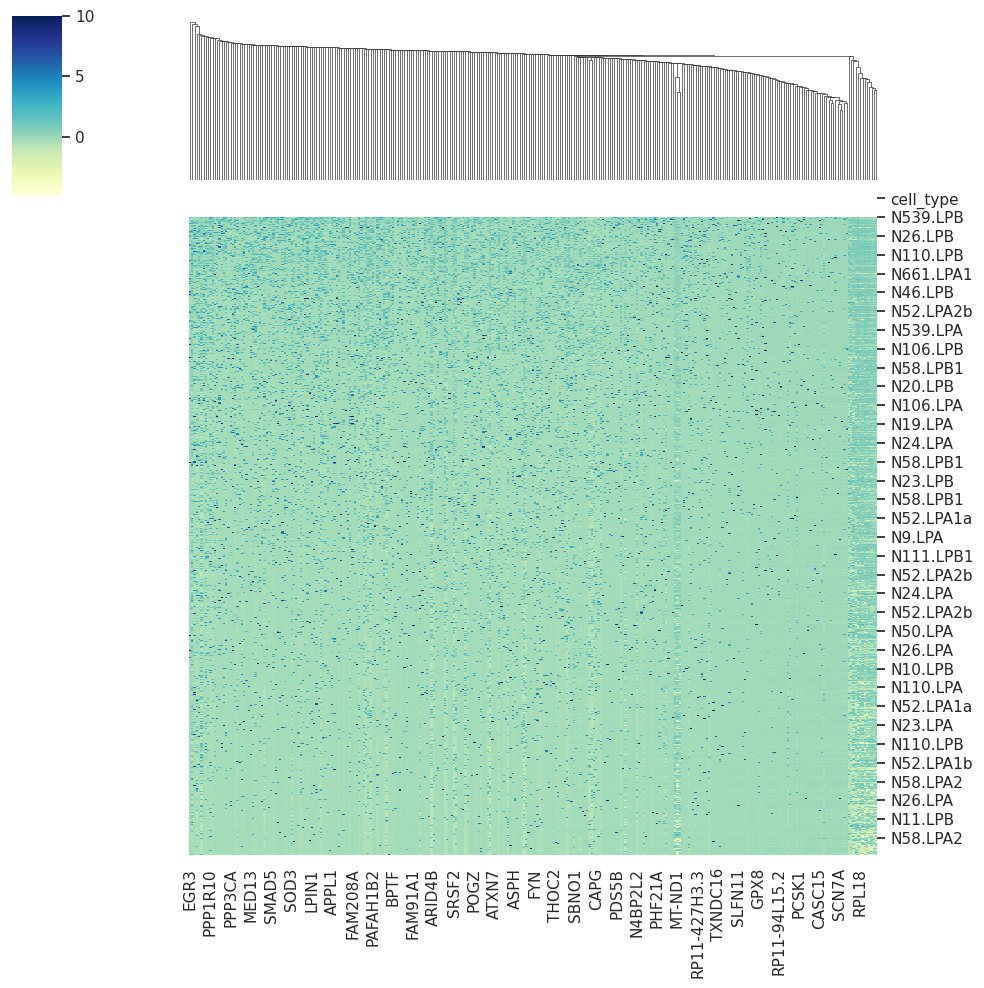

In [61]:
# immune = r, epithelial = g, fibro = b
plot = df_sorted_all
celltype = adata.obs["cell_type"]
lut = dict(zip(celltype.unique(), "rbg"))
col_colors = celltype.map(lut)
g = sns.clustermap(plot,  row_cluster=False, cmap="YlGnBu",col_colors=col_colors)